In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/dataCleaned_forPrice_20210724.csv', index_col=0, encoding='utf-8')
df.head()

,car_brand,car_model,car_year,car_mileage,car_price,car_color,car_cylinderVolume,car_driveMode,car_fuel,car_gear,verified,source,car_door,car_seat
0,TOYOTA,ALTIS,2009.0,197710.0,196000.0,黑,1800.0,2.0,汽油,手自排,1.0,HOT,NaN,NaN
1,MITSUBISHI,DELICA,2016.0,81609.0,358000.0,深藍,2400.0,2.0,汽油,手排,1.0,HOT,NaN,NaN
2,SUZUKI,CARRY,2013.0,53167.0,286000.0,銀,1600.0,2.0,汽油,手排,1.0,HOT,NaN,NaN
3,NISSAN,MARCH,2013.0,92757.0,238000.0,淺綠,1500.0,2.0,汽油,自排,1.0,HOT,NaN,NaN
4,NISSAN,SENTRA,2015.0,43307.0,378000.0,白,1800.0,2.0,汽油,手自排,1.0,HOT,NaN,NaN


In [81]:
#delete the data that price<=10000
indexNames = df[df['car_price']<=10000].index
df.drop(indexNames , inplace=True)
df.shape

(79958, 14)

In [82]:
#delete the data that price>8000000
df = df[df['car_price']<=8000000]
df.shape

(79816, 14)

In [83]:
# 空值用眾數填充
df_fill = df
df_fill['car_color'] = df_fill['car_color'].fillna(df_fill['car_color'].mode()[0])
df_fill['car_driveMode'] = df['car_driveMode'].fillna(df_fill['car_driveMode'].mode()[0])
df_fill['car_fuel'] = df_fill['car_fuel'].fillna(df_fill['car_fuel'].mode()[0])
df_fill['car_gear'] = df_fill['car_gear'].fillna(df_fill['car_gear'].mode()[0])
df_fill['verified'] = df_fill['verified'].fillna(df_fill['verified'].mode()[0])
df_fill['car_door'] = df_fill['car_door'].fillna(df_fill['car_door'].mode()[0])
df_fill['car_seat'] = df_fill['car_seat'].fillna(df_fill['car_seat'].mode()[0])

In [73]:
# 檢查是否有空值
df_fill.isnull().any().any()

False

In [74]:
#normalize the data
#不確定car_driveMode	car_door	car_seat要不要被normalize(有次序之分?)
from sklearn import preprocessing
df_new = df_fill
df_new['car_year'] = preprocessing.scale(df_new['car_year'])
df_new['car_mileage'] = preprocessing.scale(df_new['car_mileage'])
df_new['car_cylinderVolume'] = preprocessing.scale(df_new['car_cylinderVolume'])

df_new['car_driveMode'] = preprocessing.scale(df_new['car_driveMode'])
df_new['car_door'] = preprocessing.scale(df_new['car_door'])
df_new['car_seat'] = preprocessing.scale(df_new['car_seat'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


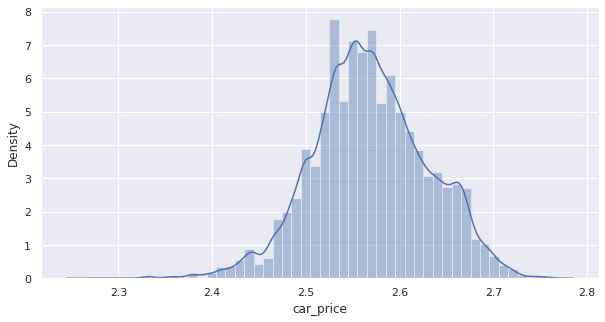

In [75]:
target = np.log(df_new['car_price'])
plt.figure(figsize = (10,5))
sns.distplot(target)
df_new['car_price'] = target

In [76]:
df2 = df_new.drop(['source'], axis=1)
df2.head()
df_dummy = pd.get_dummies(df2)
df_dummy.head()

,car_year,car_mileage,car_price,car_cylinderVolume,car_driveMode,verified,car_door,car_seat,car_brand_ACURA,car_brand_ALFA ROMEO,car_brand_ASIA,car_brand_ASTON MARTIN,car_brand_AUDI,car_brand_AUSTIN,car_brand_BENTLEY,car_brand_BENZ,car_brand_BMW,car_brand_BUICK,car_brand_CADILLAC,car_brand_CHEVROLET,car_brand_CHRYSLER,car_brand_CITROEN,car_brand_CMC,car_brand_DAIHATSU,car_brand_DFSK,car_brand_DODGE,car_brand_FERRARI,car_brand_FIAT,car_brand_FORD,car_brand_FORMOSA,car_brand_FOTON,car_brand_HINO,car_brand_HONDA,car_brand_HUMMER,car_brand_HYUNDAI,car_brand_INFINITI,car_brand_ISUZU,car_brand_IVECO,car_brand_JAGUAR,car_brand_JEEP,...,car_color_魂動紅,car_color_黃,car_color_黃深棕,car_color_黃白,car_color_黃黑,car_color_黑,car_color_黑 深紅,car_color_黑 灰,car_color_黑.深紅,car_color_黑.紅,car_color_黑曜藍,car_color_黑灰,car_color_黑灰雙,car_color_黑爵黑,car_color_黑白,car_color_黑紅,car_color_黑紫,car_color_黑藍,car_color_黑銀,car_color_黑鐵灰,car_fuel_0,car_fuel_12V輕油電柴油,car_fuel_48V輕油電,car_fuel_48V輕油電柴油,car_fuel_Hybrid 混合動力,car_fuel_插電式油電,car_fuel_未填寫,car_fuel_柴油,car_fuel_柴電複合,car_fuel_汽油,car_fuel_油電,car_fuel_油電複合,car_fuel_瓦斯雙燃料,car_fuel_純電,car_fuel_電動,car_gear_CVT 無段變速,car_gear_手排,car_gear_手自排,car_gear_自手排,car_gear_自排
0,-0.968796,-0.001148,2.500277,-0.005784,-0.390314,1.0,0.481971,-0.018203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0.591087,-0.009879,2.548530,0.000057,-0.390314,1.0,0.481971,-0.018203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,-0.077434,-0.012018,2.530815,-0.007730,-0.390314,1.0,0.481971,-0.018203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,-0.077434,-0.009041,2.516084,-0.008704,-0.390314,1.0,0.481971,-0.018203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0.368247,-0.012759,2.552772,-0.005784,-0.390314,1.0,0.481971,-0.018203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [12]:
df_dummy.shape

(79816, 5266)

In [12]:

import statsmodels.api as sm
#import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0, 0.5, 'WCSS')

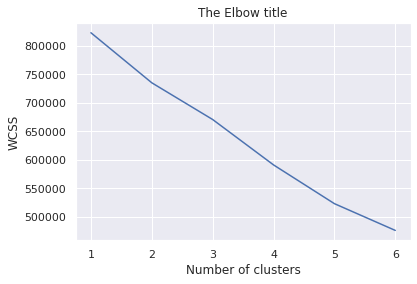

In [13]:
wcss=[]
for i in range(1,21):
    kmeans = KMeans(i)
    kmeans.fit(df_dummy)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

PCA

In [13]:
# https://365datascience.com/tutorials/python-tutorials/pca-k-means/
from sklearn.decomposition import PCA

In [15]:
#choose 2 component
pca = PCA(2)
data = pca.fit_transform(df_dummy)

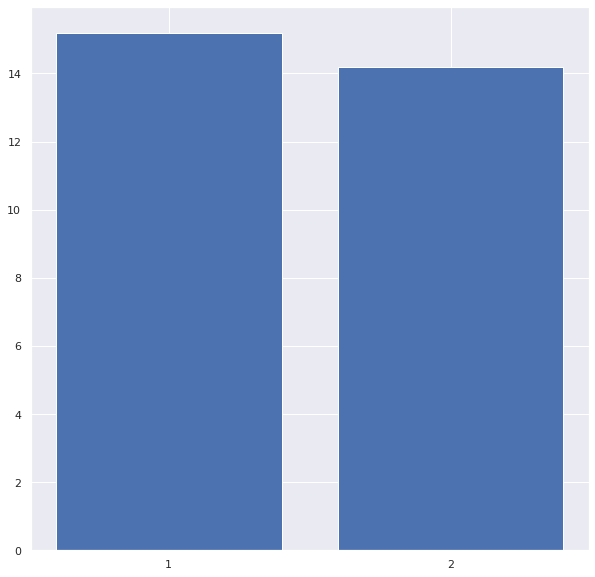

In [16]:
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()

In [21]:
#first of all, fit the data using pca
pca2 = PCA(15)
data2 = pca2.fit_transform(df_dummy)

In [ ]:
#secondly, decide features based on the variance

In [22]:
pca2.explained_variance_ratio_

array([0.15218584, 0.1423239 , 0.09706016, 0.09694597, 0.09064936,
       0.05538271, 0.03390934, 0.02780904, 0.02275981, 0.01957145,
       0.01561442, 0.01411657, 0.01320704, 0.01192998, 0.01092226])

Text(0, 0.5, 'Cumulated Explained Variance')

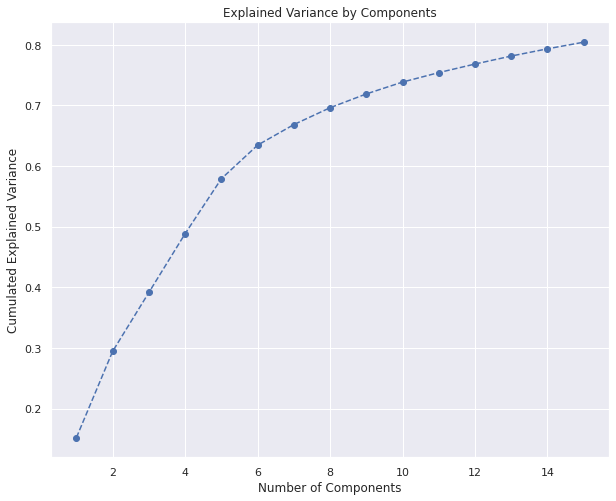

In [27]:
plt.figure(figsize = (10, 8))
plt.plot(range(1,16), pca2.explained_variance_ratio_.cumsum(), marker = 'o', linestyle= '--')
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulated Explained Variance")

In [31]:
#choose 14 componets based on the graph
pca = PCA(n_components = 14)

In [32]:
pca.fit(df_dummy)

PCA(copy=True, iterated_power='auto', n_components=14, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [33]:
pca.transform(df_dummy)

array([[ 1.06647379e+00, -8.01570266e-01, -1.57044220e-02, ...,
        -2.18435556e-01,  8.12297864e-01, -1.61651474e-01],
       [-7.01531683e-02, -2.44466461e-01, -1.07334117e-01, ...,
        -5.17255859e-01,  2.73271294e-01,  1.47360036e-01],
       [ 4.87707522e-01, -4.83104621e-01, -7.10098666e-02, ...,
        -3.57006389e-02,  3.32106692e-01,  1.82076248e-01],
       ...,
       [ 4.89531028e-02, -2.22344033e+00,  8.16115894e-03, ...,
         2.08464286e-01, -4.12228012e-01, -4.16711392e-01],
       [ 7.87207800e-01,  3.79846966e-01, -4.06820878e-02, ...,
         1.71332831e-01,  1.11237159e-01,  1.57779943e-02],
       [ 9.47452258e-01, -7.36206009e-01,  1.32478892e-03, ...,
         1.11204275e+00,  5.17210837e-01,  1.75613168e-02]])

In [34]:
scores_pca = pca.transform(df_dummy)

In [36]:
wcss = []
# 計算 k=1~10 的損失函數
for i in range(1,21):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scores_pca)
    # kmeans.inertia_
    wcss.append(kmeans.inertia_)

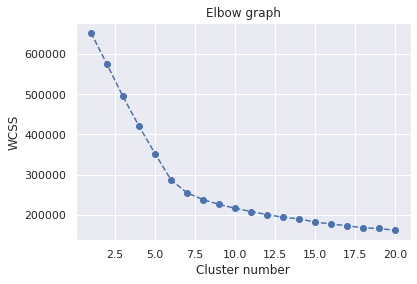

In [37]:
plt.plot(range(1,21), wcss, marker='o', linestyle= '--')
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('WCSS')
plt.show()

In [50]:
kmeans_pca = KMeans(n_clusters=7, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)
# Cust_All['clusters'] = kmeans_pca.fit_predict(Cust_All)
# print(round(pd.DataFrame(kmeans.cluster_centers_),2))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [84]:
df_segm_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis =1)
#df_segm_pca_kmeans.columns.values[-7::] = ['componet 1', 'componet 2', 'componet 3', 'componet 4', 'componet 5', 'componet 6', 'componet 7']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [85]:
df_segm_pca_kmeans.head()

,car_brand,car_model,car_year,car_mileage,car_price,car_color,car_cylinderVolume,car_driveMode,car_fuel,car_gear,verified,source,car_door,car_seat,0,1,2,3,4,5,6,7,8,9,10,11,12,13,Segment K-means PCA
0,TOYOTA,ALTIS,2009.0,197710.0,196000.0,黑,1800.0,2.0,汽油,手自排,1.0,HOT,5.0,5.0,1.066474,-0.801570,-0.015704,0.000732,-0.218098,-0.117349,-0.804264,0.264079,-0.816223,0.400670,-0.549275,-0.218436,0.812298,-0.161651,2
1,MITSUBISHI,DELICA,2016.0,81609.0,358000.0,深藍,2400.0,2.0,汽油,手排,1.0,HOT,5.0,5.0,-0.070153,-0.244466,-0.107334,0.017945,0.593504,-0.468601,0.335163,0.312432,-0.624681,0.087054,0.640885,-0.517256,0.273271,0.147360,0
2,SUZUKI,CARRY,2013.0,53167.0,286000.0,銀,1600.0,2.0,汽油,手排,1.0,HOT,5.0,5.0,0.487708,-0.483105,-0.071010,0.006818,0.216856,-0.422953,0.221485,0.352573,-0.578956,0.261341,0.675690,-0.035701,0.332107,0.182076,2
3,NISSAN,MARCH,2013.0,92757.0,238000.0,淺綠,1500.0,2.0,汽油,自排,1.0,HOT,5.0,5.0,0.615119,-0.637906,-0.083717,0.003144,0.218924,-0.561364,0.655324,0.452544,-0.584177,0.492380,0.150844,-0.428012,-0.509172,0.107094,2
4,NISSAN,SENTRA,2015.0,43307.0,378000.0,白,1800.0,2.0,汽油,手自排,1.0,HOT,5.0,5.0,-0.182157,-0.324623,-0.117402,0.004725,0.590828,-0.385807,-0.197606,-0.707503,-0.507429,0.420263,0.154548,-0.474705,-0.123558,0.009594,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


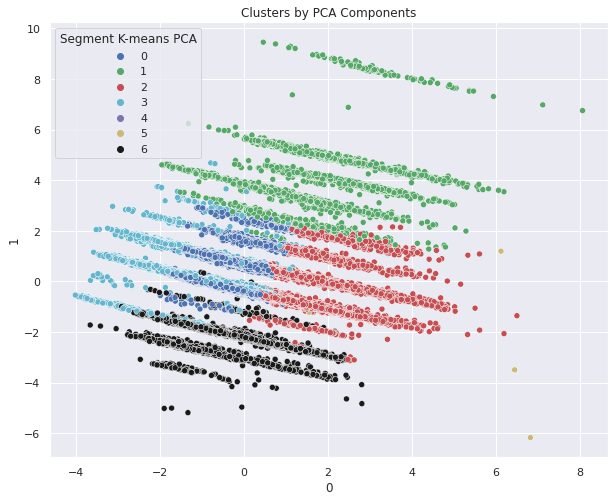

In [67]:
x_axis = df_segm_pca_kmeans[0]
y_axis = df_segm_pca_kmeans[1]
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment K-means PCA'] ,palette=['b', 'g', 'r', 'c', 'm', 'y', 'k'])
plt.title("Clusters by PCA Components")
plt.show()

In [86]:
#看各群平均價格
df_segm_pca_kmeans.groupby(['Segment K-means PCA'])['car_price'].mean()

Segment K-means PCA
0    7.090395e+05
1    8.526271e+05
2    2.390706e+05
3    1.332592e+06
4    4.580000e+05
5    2.982500e+05
6    5.345687e+05
Name: car_price, dtype: float64